## t-SNE Unsupervised Data Visualization

### t-SNE
- Stochastic Neighbor Embedding(SNE)란 고차원의 원공간에 존재하는 데이터 x의 이웃 간의 거리를 최대한 보존하는 저차원의 y를 학습하는 방법론
- t-SNE는 보통 word2vec으로 임베딩한 단어벡터를 시각화하는 데 많이 사용
- 여기서는 Mnist data vector 시각화

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

In [2]:
# scikit learn dataset load
data = datasets.fetch_openml(
                    'mnist_784',
                    version=1,
                    return_X_y=True
)
pixel_values, targets = data # piexel_value : 70000x784 행렬 >>> 70000장의 28x28 구성된 이미지
targets = targets.astype(int)

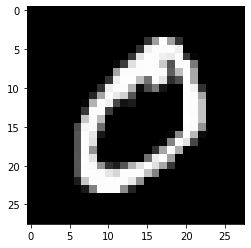

In [10]:
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [12]:
tsne = manifold.TSNE(n_components=2, random_state=2021)
transformed_data = tsne.fit_transform(pixel_values[:3000,:]) # 3000x2 행렬

In [23]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns = ['x','y','targets']
)

tsne_df.loc[:,'targets'] = tsne_df.targets.astype(int)

In [24]:
tsne_df

,x,y,targets
0,19.697187,21.675064,5
1,69.423416,3.624045,0
2,-26.193182,57.121494,4
3,-38.570995,-37.709972,1
4,-31.393301,29.080669,9
...,...,...,...
2995,-54.195301,4.756660,7
2996,64.713821,9.214671,0
2997,-42.079113,-3.116430,9
2998,0.051041,-60.178593,1


C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


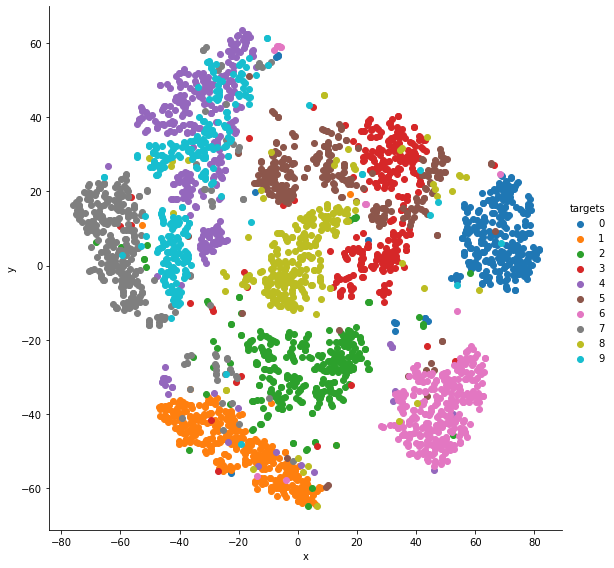

In [26]:
grid = sns.FacetGrid(tsne_df, hue='targets', size=8)
grid.map(plt.scatter,'x','y').add_legend()